<a href="https://colab.research.google.com/github/2107shantanu/All-Things-ML-DL-AI/blob/main/NBA-Longevity%20of%20Rookie/Longevity_of_NBA_Rookies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

**Content and Problem Statement**

The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world.

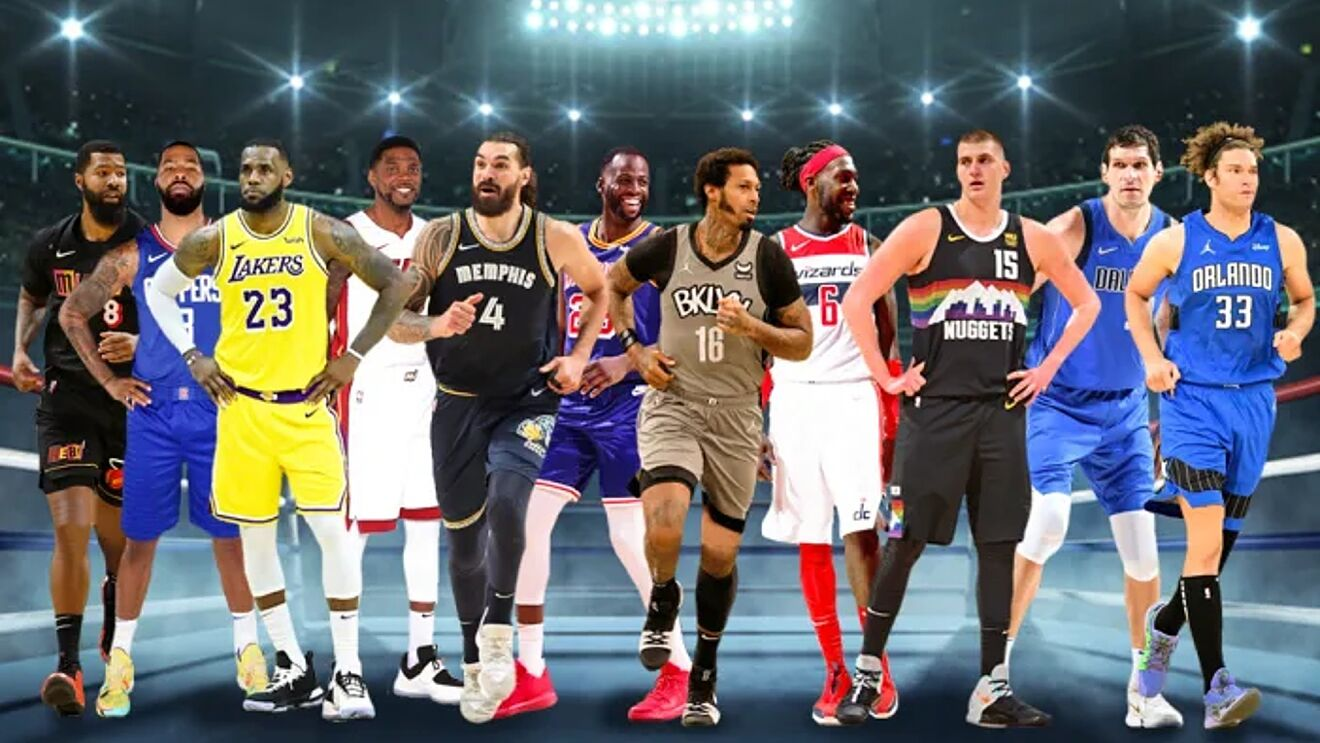

Career longevity is dependent on various factors for any players in all the games and so for NBA Rookies. The factors like games played, count of games played, and other statistics of the player during the game.

# **Objective**

Using machine learning techniques determine if a player’s career will flourish or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**About the data**

The dataset contains player statistics for NRB Rookies. There are 1100+ observations in the train dataset with 19 variables excluding the target variable (i.e. Target).

In [ ]:
# importing dataset
df_train_full = pd.read_csv('/content/drive/MyDrive/IITG CA/DPhi/Train_data.csv')
df_test_full = pd.read_csv('/content/drive/MyDrive/IITG CA/DPhi/Test_data.csv')

In [ ]:
df_train_full

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,49.0,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1
1097,35.0,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,0.1,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1
1098,65.0,13.2,5.0,2.0,5.0,41.3,0.1,0.3,35.0,0.8,1.0,76.9,0.6,1.0,1.6,1.1,0.7,0.3,0.8,0
1099,55.0,14.9,4.1,1.7,4.1,41.7,0.1,0.1,37.5,0.6,0.8,76.1,0.5,1.0,1.5,1.5,0.7,0.2,0.8,0


**Data Description**

GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)

In [ ]:
df_train_full.GP = np.floor(df_train_full.GP)
df_test_full.GP = np.floor(df_test_full.GP)

The values for given attributes are averaged over all the games played by players

* MIN:  Minutes Played

* PTS: Number of points per game

* FGM: Field goals made

* FGA: Field goals attempt

* FG%: field goals percent

* 3P Made: 3 point made

* 3PA: 3 points attempt

* 3P%: 3 point percent

* FTM: Free throw made

* FTA: Free throw attempts

* FT%: Free throw percent

* OREB: Offensive rebounds

* DREB: Defensive rebounds

* REB: Rebounds

* AST: Assists

* STL: Steals

* BLK: Blocks

* TOV: Turnovers

Target: 0 if career years played < 5, 1 if career years played >= 5

In [ ]:
df_train_full.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

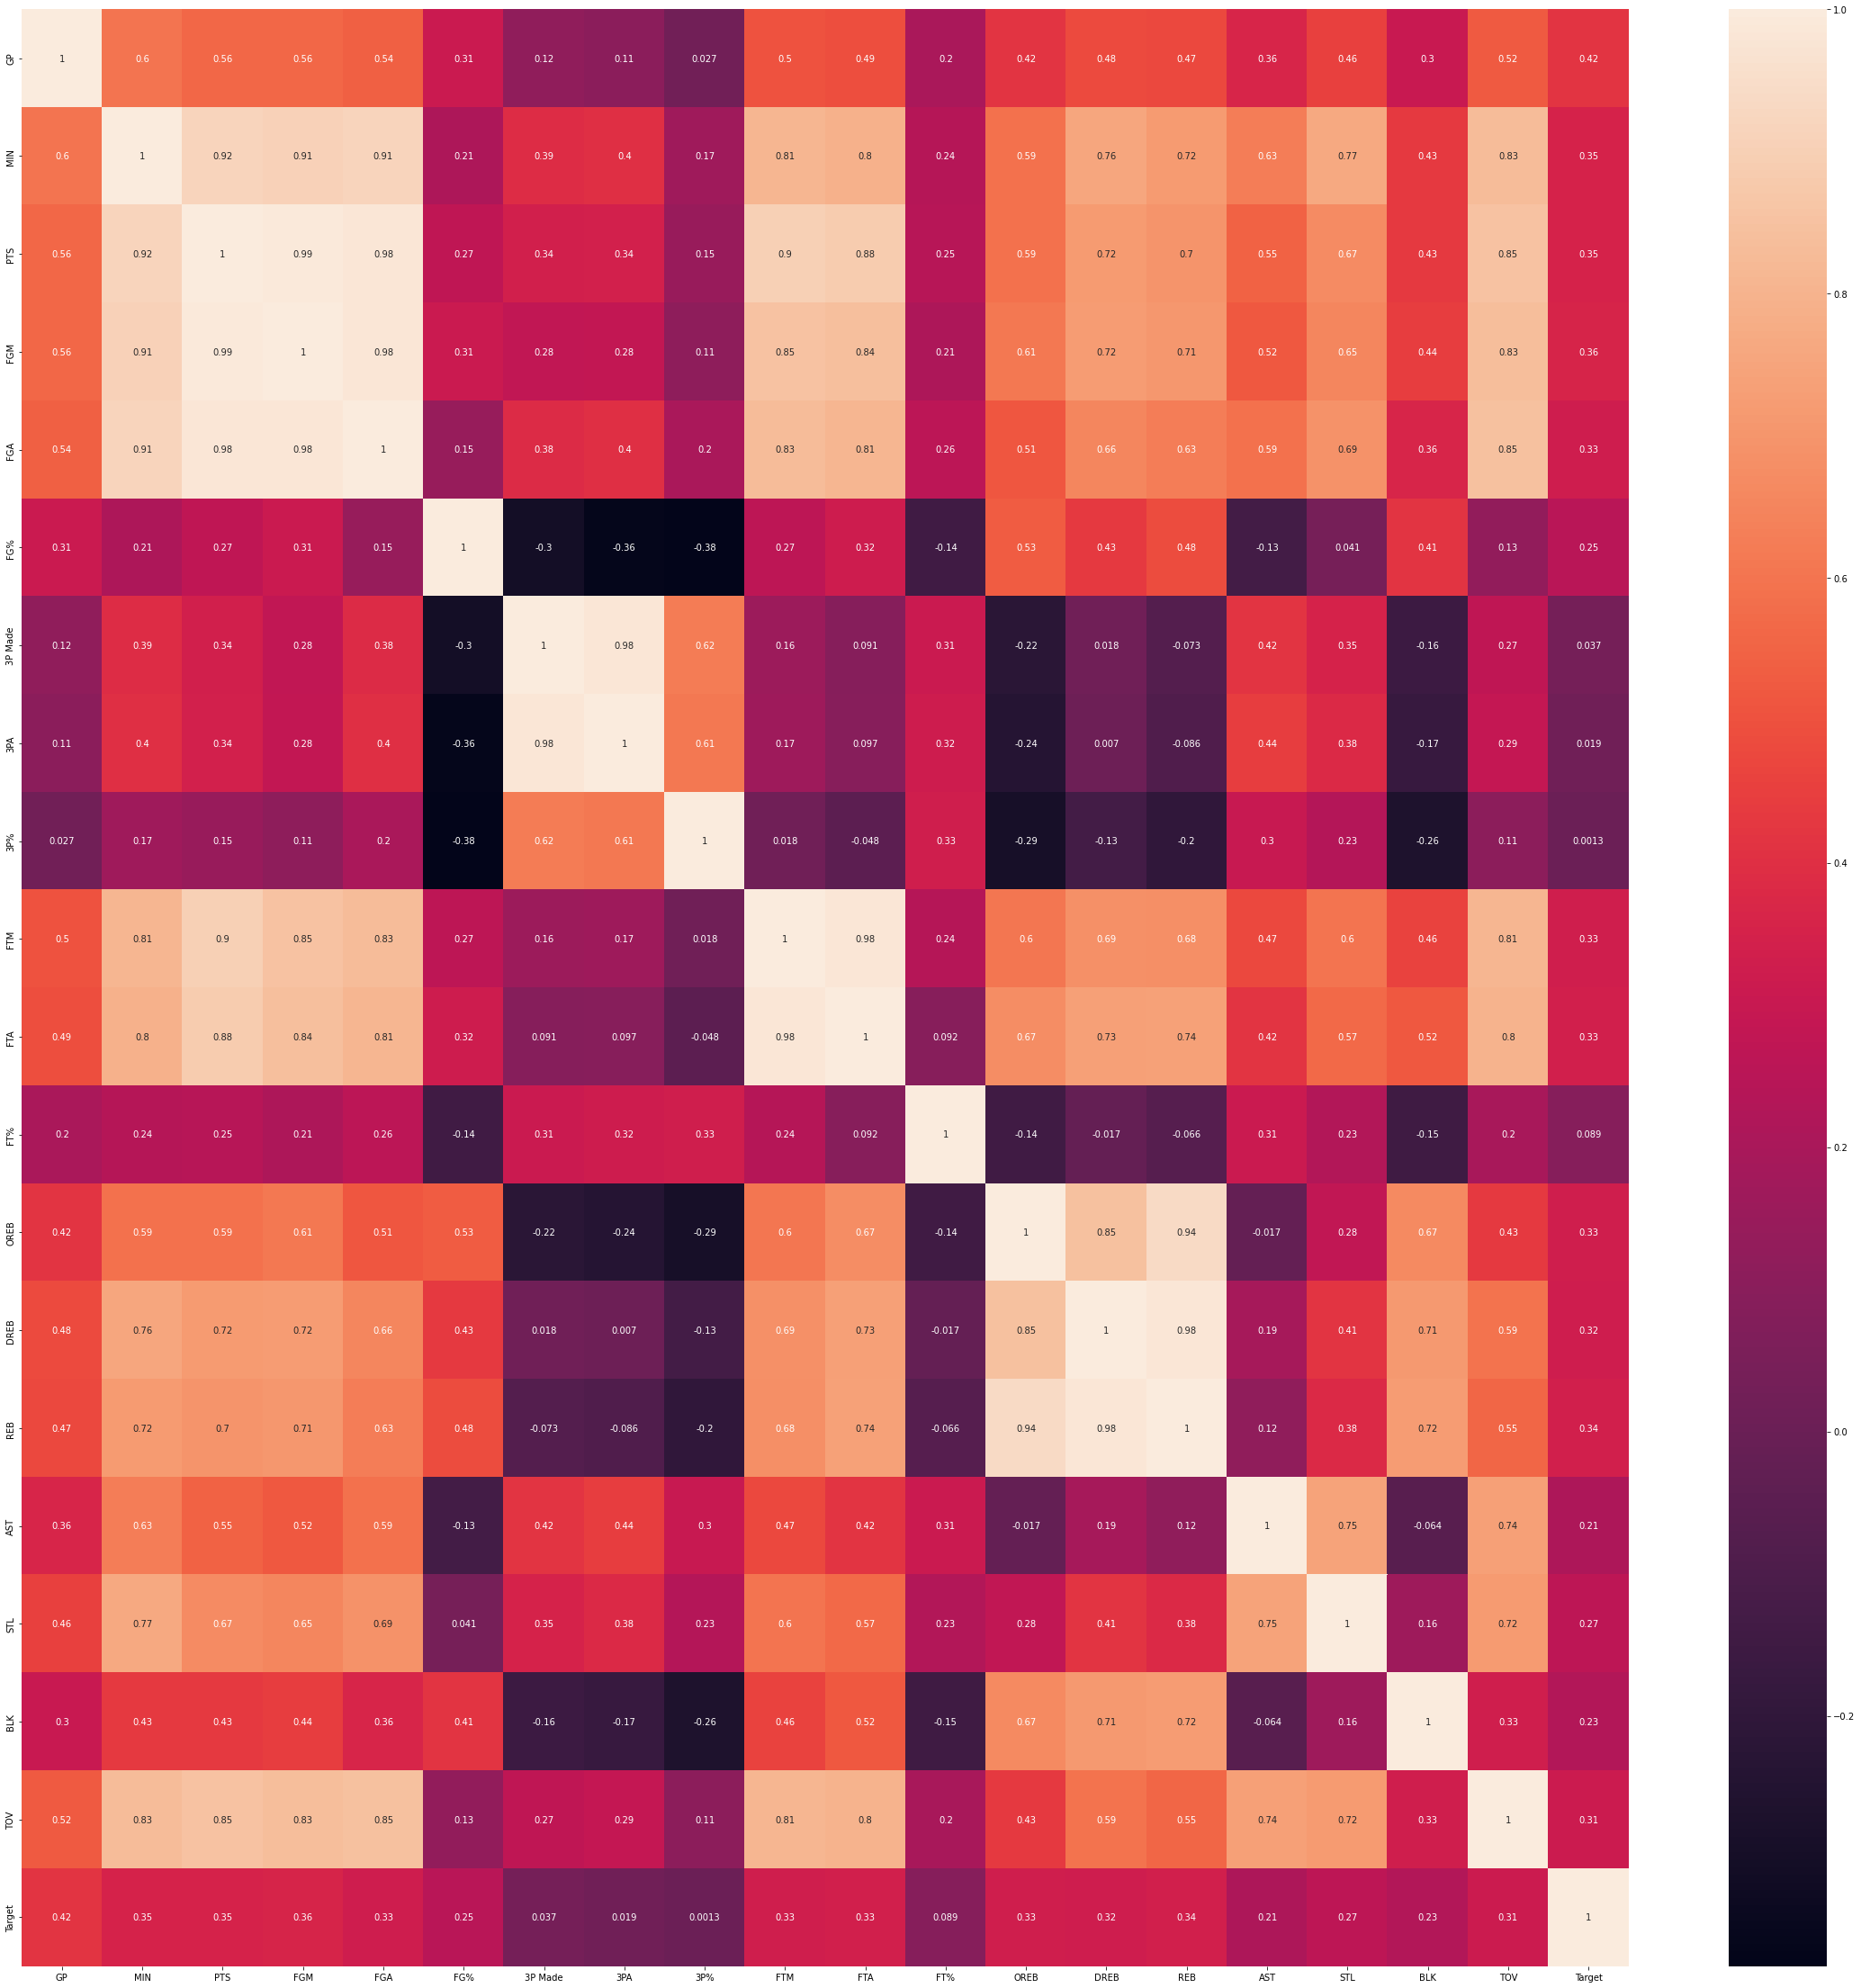

In [ ]:
#correlation between features

plt.figure(figsize=(40,40))
sns.heatmap(df_train_full.corr(), annot=True)

In [ ]:
# Checking for null value in dataset

df_train_full.isna().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
Target     False
dtype: bool

**Validation set** actually can be regarded as a part of training set, because it is used to build your model, neural networks or others. It is usually used for parameter selection and to avoid overfitting.

To summarise, the training set is -typically- the largest subset created out of the original dataset that is used to fir the models. The validation set is then used to evaluate the models in order to perform model selection.

In [ ]:
# splitting training and validation sets

X_train_full = df_train_full.drop(['Target'], axis = 1)
y_train_full = df_train_full['Target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state = 0)

In [ ]:
y_train

1062    1
1099    0
861     1
545     0
689     1
       ..
1033    1
763     0
835     1
559     1
684     1
Name: Target, Length: 825, dtype: int64

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)


In [ ]:
y_train

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000)

In [ ]:
# choosing best hyperparameters
n_est_list = [5, 50, 500, 1000, 1500]
for i in n_est_list:
  rf = RandomForestClassifier(n_estimators = i, random_state = 0)
  rf.fit(X_train_full, y_train_full)
  preds_new = rf.predict(X_valid)
  print(accuracy_score(y_valid, preds_new))

0.9782608695652174
0.9927536231884058
0.9891304347826086
0.9891304347826086
0.9891304347826086


In [ ]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(n_estimators=50, random_state=0)

In [ ]:
# testing on validation data, though not needed
preds_new = rf.predict(X_valid)
print(accuracy_score(y_valid, preds_new))

0.9927536231884058


In [ ]:
# Getting the final predictions.
preds = rf.predict(df_test_full)
print(preds.shape)

(555,)


In [ ]:
def score(model, title = "Default"):
    model.fit(X_train_full, y_train_full)
    preds = model.predict(X_valid)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_valid, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [ ]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.73188 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
adb = AdaBoostClassifier(n_estimators=1000, random_state=0)
score(adb, "AdaBoost Classifier")

Accuracy for AdaBoost Classifier : 0.94928 



In [ ]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=13, random_state=0)
score(rf1, "Random Forest Classifier")

Accuracy for Random Forest Classifier : 0.99275 



In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=13, random_state=0)
score(dt_gini,"Decision Tree Gini")

Accuracy for Decision Tree Gini : 0.99275 



In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=0)
score(dt_entropy,"Decision Tree Entropy")

Accuracy for Decision Tree Entropy : 0.99275 



In [ ]:
xgb_clf = XGBClassifier(n_estimators=2000 , learning_rate=0.1)
score(xgb_clf, "XGB Classifier")

Accuracy for XGB Classifier : 0.99275 

